[EMMA: End-to-End Multimodal Model for Autonomous Driving](https://arxiv.org/pdf/2410.23262)

https://github.com/taco-group/OpenEMMA

**Abstract**  
<!-- We introduce EMMA, an End-to-end Multimodal Model for Autonomous driving. Built on a multi-modal large language model foundation, EMMA directly maps raw camera sensor data into various driving-specific outputs, including planner trajectories, perception objects, and road graph elements. EMMA maximizes the utility of world knowledge from the pre-trained large language models, by representing all non-sensor inputs (e.g. navigation instructions and ego vehicle status) and outputs (e.g. trajectories and 3D locations) as natural language text. This approach allows EMMA to jointly process various driving tasks in a unified language space, and generate the outputs for each task using task-specific prompts. Empirically, we demonstrate EMMA's effectiveness by achieving state-of-the-art performance in motion planning on nuScenes as well as competitive results on the Waymo Open Motion Dataset (WOMD). EMMA also yields competitive results for camera-primary 3D object detection on the Waymo Open Dataset (WOD). We show that co-training EMMA with planner trajectories, object detection, and road graph tasks yields improvements across all three domains, highlighting EMMA's potential as a generalist model for autonomous driving applications. However, EMMA also exhibits certain limitations: it can process only a small amount of image frames, does not incorporate accurate 3D sensing modalities like LiDAR or radar and is computationally expensive. We hope that our results will inspire further research to mitigate these issues and to further evolve the state of the art in autonomous driving model architectures. -->

我们提出了 EMMA, 一种用于自动驾驶的端到端多模态模型。EMMA 建立在多模态大型语言模型基础上, 将原始摄像头传感器数据直接映射到各种驾驶专用输出, 包括规划器轨迹、感知对象和道路图元素。EMMA 通过将所有非传感器输入(例如导航指令和自车状态)和输出(例如轨迹和 3D 位置)表示为自然语言文本, 最大限度地利用来自预训练大型语言模型的世界知识。这种方法使 EMMA 能够在统一的语言空间中联合处理各种驾驶任务, 并使用任务专用提示生成每个任务的输出。经验上, 我们通过在 nuScenes 上实现最先进的运动规划性能以及在 Waymo Open Motion Dataset (WOMD) 上的竞争性结果, 证明了 EMMA 的有效性。EMMA 还在 Waymo Open Dataset (WOD) 上以摄像头为主的 3D 物体检测取得了有竞争力的结果。我们表明, 将 EMMA 与规划器轨迹、物体检测和道路图任务联合训练在所有三个领域取得改进, 凸显了 EMMA 作为自动驾驶应用通用模型的潜力。然而, EMMA 也表现出一些局限性: 它只能处理少量图像帧, 不包含 LiDAR 或雷达等精确的 3D 传感模态, 并且计算成本高昂。我们希望我们的结果能够激发进一步的研究, 以缓解这些问题, 并进一步推动自动驾驶模型架构的最先进水平。

# Introduction
<!-- Autonomous driving technology has made significant progress in recent years. To make autonomous vehicles a ubiquitous form of transportation, they must navigate increasingly complex real-world scenarios that require understanding rich scene context as well as sophisticated reasoning and decision-making.
    
Historically, autonomous driving systems employed a modular approach, consisting of specialized components for perception [Yurtsever et al., 2020, Li et al., 2022b, Lang et al., 2019, Sun et al., 2022, Hwang et al., 2022], mapping [Li et al., 2022a, Tancik et al., 2022], prediction [Nayakanti et al., 2023, Shi et al., 2024], and planning [Teng et al., 2023]. While this design lends itself to easier debugging and optimization of individual modules, it poses scalability challenges due to the accumulated errors among modules and limited inter-module communication. In particular, the expert-designed interfaces between modules, such as the perception and behavior modules, may struggle to adapt to novel environments because they are often pre-defined based on targeted scenarios [Bansal et al., 2019, Jiang et al., 2023, Nayakanti et al., 2023, Seff et al., 2023]. End-to-end autonomous driving systems [Hu et al., 2023, Zhai et al., 2023, Li et al., 2024] have recently emerged as a potential solution, directly learning to generate driving actions from sensor data. This approach eliminates the need for symbolic interfaces between modules and allows for joint optimization of driving objectives from raw sensor inputs. However, these systems are often specialized for specific driving tasks and trained on limited datasets, hindering their ability to generalize to rare or novel scenarios. -->

近年来, 自动驾驶技术取得了重大进展。为使自动驾驶汽车成为一种普遍的交通方式, 它们必须在日益复杂的现实场景中导航, 这些场景需要理解丰富的场景上下文以及复杂的推理和决策。

历史上, 自动驾驶系统采用模块化方法, 由专门的组件组成, 包括感知 [Yurtsever et al., 2020, Li et al., 2022b, Lang et al., 2019, Sun et al., 2022, Hwang et al., 2022]、地图构建 [Li et al., 2022a, Tancik et al., 2022]、预测 [Nayakanti et al., 2023, Shi et al., 2024] 和规划 [Teng et al., 2023]。虽然这种设计有助于更轻松地调试和优化单个模块, 但由于模块之间的累积误差和有限的模块间通信, 它带来了可扩展性挑战。特别是, 模块之间专家设计的接口, 例如感知和行为模块, 可能难以适应新环境, 因为它们通常是根据目标场景预先定义的 [Bansal et al., 2019, Jiang et al., 2023, Nayakanti et al., 2023, Seff et al., 2023]。最近, 端到端自动驾驶系统 [Hu et al., 2023, Zhai et al., 2023, Li et al., 2024] 作为一种潜在解决方案出现, 它从传感器数据直接学习以生成驾驶动作。这种方法消除了模块之间符号接口的需求, 并允许对来自原始传感器输入的驾驶目标进行联合优化。然而, 这些系统通常专门用于特定的驾驶任务, 并在有限的数据集上进行训练, 从而阻碍了它们泛化到罕见或新场景的能力。

<!-- Multimodal Large Language Models (MLLMs) [Gemini Team Google, 2023, Achiam et al., 2023] offer a promising new paradigm for AI in autonomous driving that may help to address such challenges. This is because MLLMs, as generalist foundation models, excel in two key areas: (1) they are trained on vast, internet-scale datasets that provide rich "world knowledge" beyond what is contained in common driving logs, and (2) they demonstrate superior reasoning capabilities through techniques such as chain-of-thought reasoning [Wei et al., 2022] that are not available in specialized driving systems. While recent efforts [Chen et al., 2024b, Tian et al., 2024] have explored integrating and augmenting the capabilities of existing driving systems with MLLMs, we propose to develop an autonomous driving system in which the MLLM is a first class citizen.

We introduce the End-to-End Multimodal Model for Autonomous Driving (EMMA), built on top of Gemini [Gemini Team Google, 2023] without additional specialized components. Figure 1 shows the overview of the EMMA framework. EMMA accepts camera images and plain text for other non-vision inputs such as high-level driving commands and historical context. By recasting driving tasks as visual question answering (VQA) problems, EMMA leverages Gemini’s pre-trained capabilities while preserving its extensive world knowledge. After EMMA is fine-tuned with driving logs from all tasks using task-specific prompts (see Figure 2 for more examples), its shared Gemini model generates various driving outputs such as future trajectories for motion planning, perception objects, road graph elements, and scene semantics. Our experiments showcase EMMA’s strong performance on several planning and perception benchmarks despite this simple design. Additionally, we find that EMMA can produce interpretable, human-readable outputs for many perception tasks such as road graph estimation, and is able to function as a generalist model that is both scalable and robust for autonomous driving. Notably, as used here and throughout the paper, the EMMA generalist model refers to a machine learning model that has been trained and fine-tuned on a large volume of driving data to perform a wide range of specific driving tasks in the autonomous driving domain. -->

多模态大语言模型 (MLLM) [Gemini Team Google, 2023, Achiam et al., 2023] 为自动驾驶中的人工智能提供了一个有前途的新范式, 可能有助于应对此类挑战。这是因为 MLLMs 作为通用基础模型, 在两个关键领域表现出色: (1) 它们在庞大的互联网规模数据集上进行训练, 这些数据集提供了超出常见驾驶日志的丰富“世界知识”, (2) 它们通过诸如思维链推理 [Wei et al., 2022] 等技术展示了卓越的推理能力，而这些技术在专门的驾驶系统中并不存在。尽管最近的研究 [Chen et al., 2024b, Tian et al., 2024] 已经探索用 MLLMs 集成和增强现有驾驶系统的能力, 我们建议开发一种将 MLLM 作为主要组成部分的自动驾驶系统。

我们提出了端到端自动驾驶多模态模型 (EMMA), 其构建在 Gemini [Gemini Team Google, 2023] 之上, 无需额外的专用组件。图 1 显示了 EMMA 框架的概览。EMMA 接受摄像头图像和其他非视觉输入的纯文本, 例如上层驾驶命令和历史上下文。通过将驾驶任务重新定义为视觉问答 (VQA) 问题, EMMA 利用 Gemini 的预训练能力, 同时保留其广泛的世界知识。EMMA 使用任务专用提示, 根据所有任务的驾驶日志进行微调之后(更多示例请参见图 2), 其共享的 Gemini 模型生成各种驾驶输出, 例如运动规划的未来轨迹、感知对象、道路图元素和场景语义。尽管设计简单, 但我们的实验展示了 EMMA 在多个规划和感知基准上的强大性能。此外, 我们发现 EMMA 可以为许多感知任务(例如道路图估计)生成可解释、人类可读的输出，并且能够充当可扩展且稳健的通用模型, 用于自动驾驶。值得注意的是, 在这里及整个论文中, EMMA 通用模型是指一种机器学习模型, 它已在大量驾驶数据上进行训练和微调, 可在自动驾驶领域执行各种特定驾驶任务。

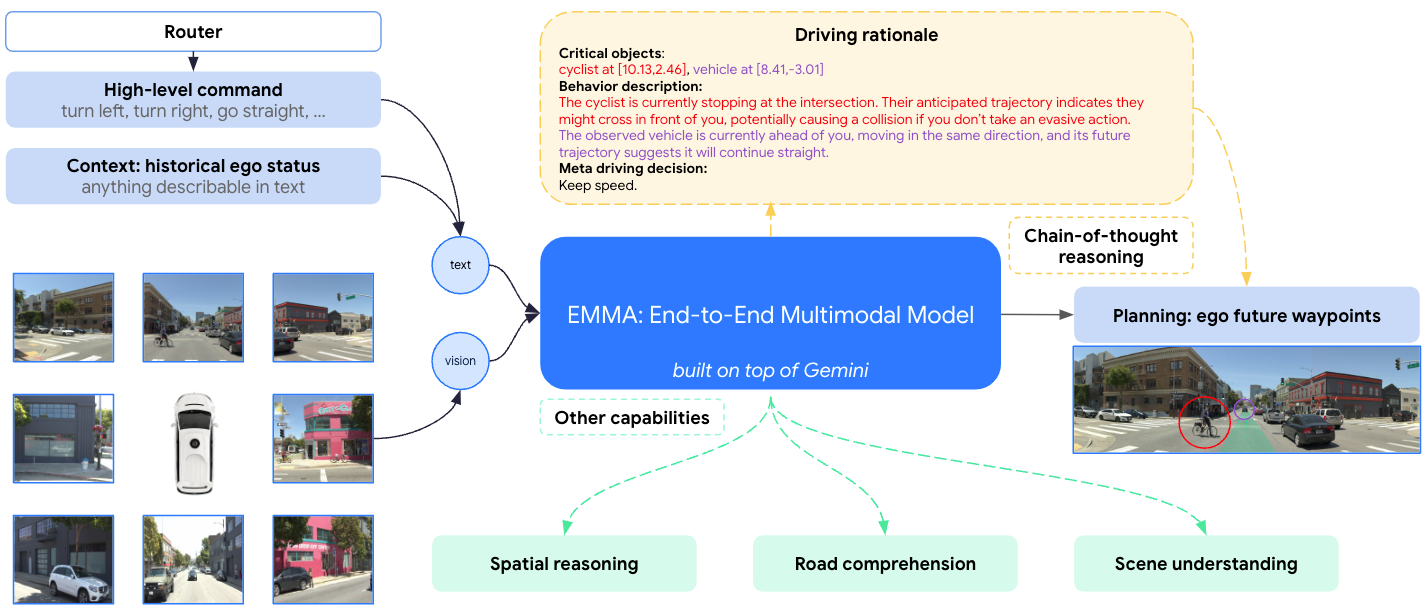
<!-- Figure 1: EMMA overview diagram. It takes 3 inputs (left): 1) a high-level command from the router, 2) historical status of the ego vehicle, and 3) surround-view camera videos. The model then predicts ego future trajectories (right) for motion planning that will be transformed into vehicle driving control signals. Further, we can ask the model to explain its rationale (top right) before predicting trajectories, which enhances both the performance and explainability of the model through chain-of-thought reasoning. Notably, we incorporate visual grounding into the rationale so that the model also predicts the accurate 3D/BEV location for critical objects. For completeness, we highlight three additional capabilities of our model (bottom). -->
图 1: EMMA 概览图。它需要 3 个输入(左): 1) 来自导航的上层命令, 2) 自车的历史状态, 3) 环视摄像头视频。然后, 该模型预测自车的未来轨迹(右), 用于运动规划, 并将这些轨迹转换为车辆驾驶控制信号。此外, 我们可以要求模型在预测轨迹之前解释其原理(右上), 这通过思路链推理增强模型的性能和可解释性。值得注意的是, 我们将视觉基础整合到推理中, 以便模型还能够预测关键物体的准确 3D/BEV 位置。为了完整起见, 我们强调模型的三个附加能力(底部)。

<!-- We summarize our key findings below:
1.EMMA exhibits strong performance in end-to-end motion planning, achieving state-of-the-art performance on public benchmarks nuScenes [Caesar et al., 2020] and competitive results on the Waymo Open Motion Dataset (WOMD) [Chen et al., 2024a]. We also show that we can further improve motion planning quality with more internal training data and chain-of-thought reasoning.
2.EMMA demonstrates competitive results for various perception tasks including 3D object detection, road graph estimation, and scene understanding. On the camera-primary Waymo Open Dataset (WOD) [Hung et al., 2024], EMMA achieves better precision and recall for 3D object detection than state-of-the-art methods.
3. We demonstrate that EMMA can function as a generalist model in the autonomous driving domain, which jointly generates the outputs for multiple driving related tasks. In particular, EMMA matches or even surpasses the performance of individually trained models when it is co-trained with motion planning, object detection, and road graph tasks.
4.Finally, we show EMMA’s capacity to reason and make decisions in complex, long-tail driving scenarios.

Despite these promising results, EMMA is not without its limitations. In particular, it faces challenges for real-world deployment due to: (1) limitations in 3D spatial reasoning due to its inability to fuse camera inputs with LiDAR or radar, (2) the need for realistic and computationally expensive sensor simulation to power its closed-loop evaluation, and (3) the increased computational requirements relative to conventional models. We plan to better understand and address such challenges in future work. -->

我们将主要发现总结如下:
1. EMMA 在端到端运动规划中表现强劲, 在公共基准 nuScenes [Caesar et al., 2020] 上实现最先进的性能, 并在 Waymo Open Motion Dataset (WOMD) [Chen et al., 2024a] 上取得具有竞争力的结果。我们还表明，我们可以通过更多的内部训练数据和思路链推理进一步提高运动规划质量。
2. EMMA 在多种感知任务中展示出具有竞争力的结果, 包括 3D 物体检测、道路图估计和场景理解。在以摄像头为主的 Waymo Open Dataset (WOD) [Hung et al., 2024] 上, EMMA 在 3D 物体检测方面的精度和召回率优化最先进的方法。
3. 我们证明 EMMA 可以作为自动驾驶领域的通用模型, 它联合生成多个驾驶相关任务的输出。具体而言, 当 EMMA 与运动规划、物体检测和道路图任务共同训练时, 其性能匹敌甚至超越单独训练的模型。
4. 最后, 我们展示了 EMMA 在复杂的长尾驾驶场景中推理和决策的能力。

尽管取得这些令人鼓舞的结果, 但 EMMA 仍然存在一些局限性。具体而言, 它在现实世界的部署中面临挑战, 因为: (1) 由于无法将摄像头输入与 LiDAR 或雷达融合, 导致 3D 空间推理受到限制, (2) 需要现实且计算成本高昂的传感器模拟, 来增强其闭环评估, (3) 与传统模型相比, 计算要求更高。我们计划在未来的工作中更好地理解并解决这些挑战。

# Method

<!-- EMMA is built on top of Gemini [Gemini Team Google, 2023], a family of MLLMs developed at Google. We leverage the auto-regressive Gemini models that are trained to process interleaved textual and visual inputs to produce text outputs:
$$ O = \mathcal{G}(T,V) \tag{(1)} $$
where $\mathcal{G}$ is the Gemini model, $O$ represents natural language outputs, $T$ represents natural language prompts, and $V$ denotes images or videos. The language output $O= (o_1, o_2, \dots, o_n)$ is generated via next-token prediction, i.e., the output probability can be represented as $P(O|T,V) = \Pi^n_{i=1} P\left(o_i|o_{<i},T,V\right)$ for $n$ output tokens. Our goal is to adapt $\mathcal{G}$ for autonomous driving applications, thereby harnessing the world knowledge obtained during its pre-training phase. -->

EMMA 建立在 Gemini [Gemini Team Google, 2023] 的基础之上, Gemini 是 Google 开发的一系列多模态大型语言模型(MLLMs)。我们利用经过训练的自回归 Gemini 模型, 处理交错的文本和视觉输入以生成文本输出:
$$ O = \mathcal{G}(T,V) \tag{1} $$
其中 $\mathcal{G}$ 是 Gemini 模型, $O$ 表示自然语言输出, $T$ 表示自然语言提示, $V$ 表示图像或视频。语言输出 $O= (o_1, o_2, \dots, o_n)$ 通过下一个词元预测生成, 即输出概率可以表示为 $P(O|T,V) = \Pi^n_{i=1} P\left(o_i|o_{<i},T,V\right)$, 其中 $n$ 为输出词元的数量。我们的目标是将 $\mathcal{G}$ 应用于自动驾驶应用, 从而利用其预训练阶段获得的世界知识。

<!-- As shown in Figure 1, we map autonomous driving tasks into Gemini-based EMMA formulation. All sensor data are represented as stitched images or videos as $V$; all router commands, driving context, and task-specific prompts are represented as $T$; all output tasks are presented as language outputs $O$. A challenge is that many of the inputs and outputs need to capture 3D world coordinates, such as waypoint BEV (Bird’s Eye View) locations $(x, y)$ for motion planning and the location and size of 3D boxes. We consider two representations: The first is direct text conversion to floating-point numbers, expressed as $T_\text{coordinates} = \left\{ (x_i, y_i) \right\} \approx \text{text}\left(\left\{ (x_i, y_i) \right\} \right)$, where the specified decimal precision depends on the distance unit and decimal points. RT-2 [Brohan et al., 2023] exemplifies this approach in robotic control. The second approach uses special tokens to represent each location or action, formulated as $T_\text{coordinates} = \left\{ (x_i, y_i) \right\} \approx \text{tokenize}\left(\left\{ (x_i, y_i) \right\} \right)$, with resolution determined by the learned or manually defined discretization scheme. MotionLM [Seff et al., 2023] leverages this method for motion forecasting. We note that the two approaches have their respective strengths and weaknesses. We opt for the text representation such that all tasks can share the same unified language representation space and they can maximally reuse the knowledge from the pre-trained weights, even though the text presentation may produce more tokens than specialized tokenization. -->

如图 1 所示, 我们将自动驾驶任务映射到基于 Gemini 的 EMMA 公式中。所有传感器数据被表示为拼接的图像或视频 $V$; 所有导航命令、驾驶上下文和任务专用提示都表示为 $T$; 所有输出任务都以语言输出 $O$ 的形式呈现。一个挑战是许多输入和输出需要捕获 3D 世界坐标, 例如用于运动规划的途径点 BEV (鸟瞰图) 位置 $(x, y)$ 以及 3D 框的位置和大小。我们考虑两种表示形式: 第一种是直接将文本转换为浮点数, 表示为 $T_\text{coordinates} = \left\{ (x_i, y_i) \right\} \approx \text{text}\left(\left\{ (x_i, y_i) \right\} \right)$, 其中指定的小数精度取决于距离单位和小数点。 RT-2 [Brohan et al., 2023] 在机器人控制中示范了这种方法。第二种方法使用特殊词元表示每个位置或动作, 公式为 $T_\text{coordinates} = \left\{ (x_i, y_i) \right\} \approx \text{tokenize}\left(\left\{ (x_i, y_i) \right\} \right)$, 其精度由学习或人工定义的离散化方案决定。MotionLM [Seff et al., 2023] 利用此方法进行运动预测。我们注意到这两种方法各有优缺点。我们选择文本表示, 以便所有任务能够共享相同的统一语言表示空间, 并且可以最大限度地重用预训练权重的知识, 尽管文本表示可能产生比专业分词更多的词元。

## End-to-End Motion Planning

<!-- EMMA employs a unified, end-to-end trained model to generate future trajectories for autonomous vehicles directly from sensor data. These generated trajectories are then transformed into vehicle-specific control actions such as acceleration and turning for autonomous vehicles. EMMA’s end-to-end approach aims to emulate human driving behavior, focusing on two critical aspects: (1) first, the use of navigation systems (e.g. Google Maps) for route planning and intent determination, and (2) second, the utilization of past actions to ensure smooth, consistent driving over time.

Our model incorporates three key inputs to align with these human driving behaviors:
1. **Surround-view camera videos** ($V$): Provides comprehensive environment information.
2. **High-level intent command** ($T_\text{intent}$): Derived from the router, includes directives such as “go straight”, “turn left”, “turn right”, etc.
3. **Set of historical ego status** ($T_\text{ego}$): Represented as a set of waypoint coordinates in Bird’s Eye View (BEV) space, $T_\text{ego} = \left\{ (x_t, y_t) \right\}^{-T_h}_{t=-1}$ for $T_h$ timestamps. All waypoint coordinates are represented as plain text without specialized tokens. This can also be extended to include higher-order ego status such as velocity and acceleration. -->

EMMA 采用统一的端到端训练模型，直接从传感器数据生成自动驾驶汽车的未来轨迹。然后, 这些生成的轨迹被转换成车辆专用控制动作, 例如自动驾驶汽车的加速和转向。EMMA 的端到端方法旨在模拟人类驾驶行为, 重点关注两个关键方面: (1) 使用导航系统(例如 Google 地图)进行路线规划和意图确定; (2) 利用过去的行为确保随着时间推移的平稳、一致地驾驶。

我们的模型结合三个关键输入, 以对齐人类驾驶行为:
1. **环视摄像头视频** ($V$): 提供全面的环境信息。
2. **上层意图命令** ($T_\text{intent}$): 源自路由器, 包括“直行”、“左转”、“右转”等指令。
3. **历史自车状态集** ($T_\text{ego}$): 表示为鸟瞰 (BEV) 空间中的一组途径点坐标, $T_\text{ego} = \left\{ (x_t, y_t) \right\}^{-T_h}_{t=-1}$, 其中 $T_h$ 为时间戳。所有途径点坐标以纯文本形式表示, 不使用专门的词元。这也可以扩展到包括更高阶的自车状态, 例如速度和加速度。

<!-- The model generates future trajectories for motion planning, represented as a set of future trajectory waypoints for the ego vehicle in the same BEV space: $O_\text{trajectory} = \left\{ (x_t, y_t) \right\}^{T_f}_{t=1}$ for future $T_f$ timestamps, where all output waypoints are also represnted as plain text. Putting everything together, the complete formulation is expressed as:
$$ O_\text{trajectory} = \mathcal{G}(T_\text{intent}, T_\text{ego}, V) \tag{(2)} $$
We then fine-tune Gemini with this formulation for end-to-end planner trajectory generation, as illustrated in Figure 1. We highlight 3 characteristics of this formulation:
1. **Self-supervised**: the only required supervision is the future locations of the ego vehicle. No dedicated human labels are needed.
2. **Camera-only**: the only sensor input required is surround-view cameras.
3. **HD map free**: no HD map is needed beyond the high-level routing information from a navigation system such as Google Maps.

While we are not the first to adopt this general formulation—[Li et al., 2024] conducted a thorough investigation, particularly examining the impact of including the historical ego status—our contribution lies in adapting this formulation specifically for MLLMs for autonomous driving. -->

该模型生成用于运动规划的未来轨迹，表示为自车在同一 BEV 空间中的一组未来轨迹途径点: $O_\text{trajectory} = \left\{ (x_t, y_t) \right\}^{T_f}_{t=1}$, 未来 $T_f$ 个时间戳, 其中所有输出途径点也表示为纯文本。将所有内容结合在一起, 完整的公式表示为:
$$ O_\text{trajectory} = \mathcal{G}(T_\text{intent}, T_\text{ego}, V) \tag{2} $$
然后, 我们使用上式对 Gemini 进行微调, 用于端到端规划器轨迹生成, 如图 1 所示。我们重点介绍上式的 3 个特点:
1. **自监督**: 唯一需要的监督是自车的未来位置。无需专门的人工标签。
2. **仅摄像头**: 唯一需要的传感器输入是环视摄像头。
3. **无高清地图**: 除了来自 Google 地图等导航系统的上层导航信息外, 不需要高清地图。

虽然我们并不是第一个采用这种通用公式的研究者 —— [Li et al., 2024] 进行了彻底的调查, 特别是研究了包括历史自车状态的影响 —— 但我们的贡献在于专门为自动驾驶的 MLLMs 调整了该公式。

## Planning with Chain-of-Thought Reasoning

<!-- Chain-of-thought Prompting [Wei et al., 2022] is a powerful tool in MLLMs that enhances reasoning capabilities and improves explainability. In EMMA, we incorporate chain-of-thought reasoning into end-to-end planner trajectory generation by asking the model to articulate its decision rationale $O_\text{rationale}$ while predicting the final future trajectory waypoints $O_\text{trajectory}$.

We structure the driving rationale hierarchically, progressing from 4 types of coarse-to-fine-grained information:
R1 - **Scene description** broadly describes the driving scenarios, including weather, day of time, traffic situations, and road conditions. For example: The weather is clear and sunny, and it is daytime. The road is four-lane undivided street with a crosswalk in the middle. There are cars parked on both sides of the street.
R2 - **Critical objects** are the on-road agents that can potentially influence the driving behavior of the ego vehicle, and we require the model to identify their precise 3D/BEV coordinates. For instance: pedestrian at [9.01, 3.22], vehicle at [11.58, 0.35] .
R3 - **Behavior description of critical objects** describes the current status and intent for the identified critical objects. A concrete example is as follows: The pedestrian is currently standing on the sidewalk, looking toward the road, and maybe preparing to cross the street. The vehicle is currently ahead of me, moving in the same direction, and its future trajectory suggests it will continue straight.
R4 - **Meta driving decision** includes 12 categories of high-level driving decisions, summarizing the driving plan given the previous observations. An example would be I should keep my current low speed. -->

思路链提示 [Wei et al., 2022] 是 MLLMs 中的一个强大工具, 它增强推理能力并提高可解释性。在 EMMA 中, 我们通过要求模型阐明其决策推理 $O_\text{rationale}$, 同时预测最终的未来轨迹途径点 $O_\text{trajectory}$, 将思路链推理融入端到端规划器轨迹生成中。

我们按层次结构构建驾驶推理, 从 4 类粗粒度到细粒度的信息逐步推进:
- R1 - **场景描述**广泛描述驾驶场景, 包括天气、时间、交通状况和道路条件。例如: 天气晴朗, 是白天。道路是一条四车道的非分隔街道, 中间有一条人行横道。街道两侧都停着车。
- R2 - **关键对象**是可能影响自车驾驶行为的路上智能体, 我们需要模型识别其精确的 3D/BEV 坐标。例如: 行人在 [9.01, 3.22], 车辆在 [11.58, 0.35]。
- R3 - **关键对象的行为描述**描述了已识别关键对象的当前状态和意图。具体示例如下: 行人目前站在人行道上, 朝马路望去, 可能正准备过马路。车辆目前在我前面, 朝同一方向行驶, 其未来轨迹表明它将继续直行。
- R4 - **元驾驶决策**包括 12 类上层驾驶决策, 根据之前的观察总结驾驶计划。例如, 我应该保持当前的低速。

<!-- We highlight that the driving rationale captions are generated using an automated tool without any additional human labels, ensuring scalability of the data generation pipeline. Specifically, we leverage off-the-shelf perception and prediction expert models to identify critical agents, and then use Gemini models with carefully designed visual and text prompts to generate comprehensive scene and agent behavior descriptions. Meta driving decisions are computed using a heuristic algorithm that analyzes the ego vehicle’s ground-truth trajectory.

During both training and inference, the model predicts all four components of the driving rationale before predicting the future waypoints, i.e.,
$$ \left( O_\text{rationale}, O_\text{trajectory} \right) = \mathcal{G}(T_\text{intent}, T_\text{ego}, V) \tag{(3)} $$
Where $O_\text{rationale}$ denotes an ordered text output of $(R1, R2, R3, R4)$ for driving rationale. Empirically, we observe that the prediction order of $O_\text{rationale}$ and $O_\text{trajectory}$ does not result in a significant difference in quality after model convergence. This suggests that we can predict $O_\text{trajectory}$ first and apply early stopping during inference for time-critical applications. -->

我们强调, 驾驶推理描述是使用自动化工具生成的, 无需任何额外的人工标签, 从而确保数据生成 pipeline 的可扩展性。具体而言, 我们利用现成的感知和预测专家模型识别关键智能体, 然后使用 Gemini 模型和精心设计的视觉和文本提示, 生成全面的场景和智能体行为描述。使用启发式算法计算出元驾驶决策, 该算法分析自车的真实轨迹。

在训练和推理期间, 模型在预测未来途径点之前, 预测驾驶推理的所有四个组成部分, 即
$$ \left( O_\text{rationale}, O_\text{trajectory} \right) = \mathcal{G}(T_\text{intent}, T_\text{ego}, V) \tag{3} $$
其中 $O_\text{rationale}$ 表示驾驶推理的有序文本输出 $(R1, R2, R3, R4)$。经验上, 我们观察到, <font color="red">在模型收敛后</font>, $O_\text{rationale}$ 和 $O_\text{trajectory}$ <font color="red">的预测顺序不会导致质量方面的显著差异</font>。<font color="red">这表明, 对于时间敏感的应用, 我们可以先预测</font> $O_\text{trajectory}$, <font color="red">然后在推理过程中应用提前停止</font>。

## EMMA Generalist
<!-- While end-to-end motion planning is the ultimate core task, a comprehensive autonomous driving system requires additional capabilities. Specifically, it must perceive the 3D world and recognize surrounding objects, the road graph and the traffic conditions. To achieve this goal, we formulate EMMA as a generalist model capable of handling multiple driving tasks through training mixtures.

Our vision-language framework represents all non-sensor inputs and outputs as plain text, providing the flexibility necessary to incorporate many other driving tasks. We employ instruction-tuning, a well-established approach in LLMs, to jointly train all tasks together with task-specific prompts included in the inputs $T$ of Eq. 1. We organize these tasks into three primary categories: spatial reasoning, road graph estimation, and scene understanding. Fig. 2 illustrates the overall EMMA Generalist diagram.

**Spatial reasoning** is the ability to understand, reason, and draw conclusions about objects and their relationships in space. This enables an autonomous driving system to interpret and interact with its surrounding environment for safe navigation. -->

虽然端到端运动规划是最终的核心任务, 但全面的自动驾驶系统需要额外的能力。具体而言, 它必须感知 3D 世界并识别周围的物体、道路图和交通状况。为实现这一目标, 我们将 EMMA 设计为一个通用模型, 能够通过训练混合, 处理多种驾驶任务。

我们的-视觉语言框架将所有非传感器输入和输出表示为纯, 本，提供了整合许多其他驾驶任务所需的灵活性。采用指令微调，这是一种在大型语言模型（LLMs）中广泛采用的方法, 将所有任务与公式 1 的输入 $T$ 中包含的任务专用提示一起联合训练提示。我们将这些任务分为三个主要: 别：空间推理、道路图估计和场景理解。图 2 展整个 EMMA 通用框架用图。

**空间推理** 是理解总结得出关于物体及其系的结论的能力。这使自动驾驶系统并够解释和与周围, 环境交互以实现安
导航。

Our primary focus for spatial reasoning is 3D object detection. We follow Pix2Seq [Chen et al., 2022a] and formulate the output 3D bounding boxes as $O_\text{boxes} = \text{set} \left\{ \text{text} (x, y, z, l, w, h, \theta, \text{cls}) \right\} $ where $(x, y, z)$ are the center location in the vehicle frame, $l$, $w$, $h$ are the length, width, and height of the box, $\theta$ is the heading angle, and $\text{cls}$ is the class label in text. We convert a 7D box to text by writing floating-point numbers with two decimal places, separated by spaces between each dimension. We then represent the detection tasks using a fixed prompt $T_{detect_3D}$, such as “detect every object in 3D”, as in the following:
$$ O_\text{boxes} = \mathcal{G}(T_\text{detect_3D}, V) \tag{4} $$
While $O_\text{boxes}$ is an unordered set of boxes, the predictions from an auto-regressive language model are always ordered. We find that sorting the 3D bounding boxes by depth improves detection quality, in contrast with the findings in Pix2Seq [Chen et al., 2022a].

**Road graph estimation** focuses on identifying critical road elements for safe driving, including semantic elements (e.g., lane markings, signs) and physical properties (e.g., lane curvature). The collection of these road elements forms a road graph. For example, lane segments are represented by (a) nodes, where the lanes encounter an intersection, merge, or split and (b) edges between these nodes following the direction of traffic. The full road-graph is composed of many such polyline segments.

While edges within each polyline are directional, each polyline does not necessarily have a unique order relative to the other elements. This bears similarity to object detection (e.g., [Carion et al., 2020, Chen et al., 2022a]), where each box is defined by ordered attributes (top-left corner, bottom-right corner), but a relative ordering between boxes does not necessarily exist. There are several existing works that model polyline graphs with Transformers [Yuan et al., 2024, Liao et al., 2024a,b, 2023, Ding et al., 2023, Qiao et al., 2023, Liu et al., 2023, Li et al., 2022a], sharing similarities with language models.

Our general modeling formulation in EMMA is as follows:
$$ O_\text{oadgraph} = \mathcal{G}(T_\text{estimate_roadgraph}, V) \tag{5} $$

In [5]:
from pypdf import PdfReader

pdf_path = "/mnt/d/EMMA.pdf"

reader = PdfReader(pdf_path)
number_of_pages = len(reader.pages)
page = reader.pages[4]
text = page.extract_text()
print(text)

We highlight that the driving rationale captions are generated using an automated tool without any
additional human labels, ensuring scalability of the data generation pipeline. Specifically, we leverage
off-the-shelf perception and prediction expert models to identify critical agents, and then use Gemini
models with carefully designed visual and text prompts to generate comprehensive scene and agent
behavior descriptions. Meta driving decisions are computed using a heuristic algorithm that analyzes
the ego vehicle’s ground-truth trajectory.
During both training and inference, the model predicts all four components of the driving rationale
before predicting the future waypoints, i.e.,
(Orationale ,Otrajectory ) =G(Tintent,Tego,V). (3)
WhereOrationale denotes an ordered text output of (R1, R2, R3, R4) for driving rationale. Empirically,
we observe that the prediction order of Orationale andOtrajectory does not result in a significant difference
in quality after model convergence. This s